In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from doc2vec.plot import (plot_matrix_heatmap,
                          plot_2d_projection)
from doc2vec.metric import similarity_matrix
from doc2vec import DocEmbedder
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import (normalized_mutual_info_score,
                             adjusted_rand_score)
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv('./paper.csv',encoding='latin1')
df.head(3)

,topic,title,subject
0,machine learning,Minimax deviation strategies for machine learn...,The article is devoted to the problem of small...
1,machine learning,MLBench: How Good Are Machine Learning Clouds ...,We conduct an empirical study of machine learn...
2,machine learning,Introduction to Machine Learning: Class Notes ...,Introduction to Machine learning covering Stat...


In [6]:
doc_embedder = DocEmbedder()
docvecs = doc_embedder.fit_transform(df.subject.values)

Document Ebeddimg Done
Embedded X shape: (500, 512)


/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/universal_encoding_tsne_plot.eps
  warn('Filename: {}'.format(filename))


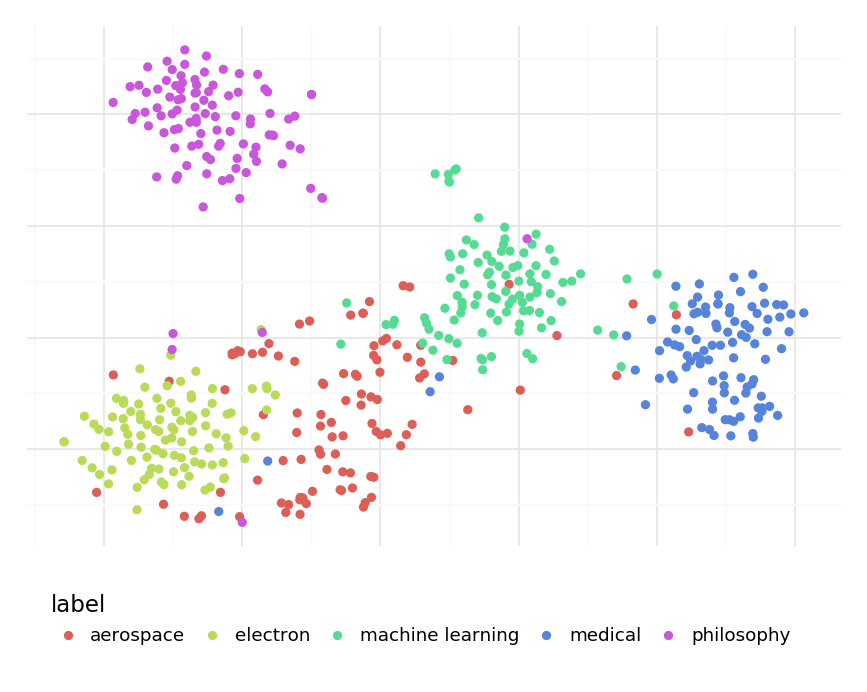

In [7]:
g=doc_embedder.scatter_plot(df.topic,
                            save_to = 'figures/universal_encoding_tsne_plot.eps')

/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/universal_encoding_pca_plot.eps
  warn('Filename: {}'.format(filename))


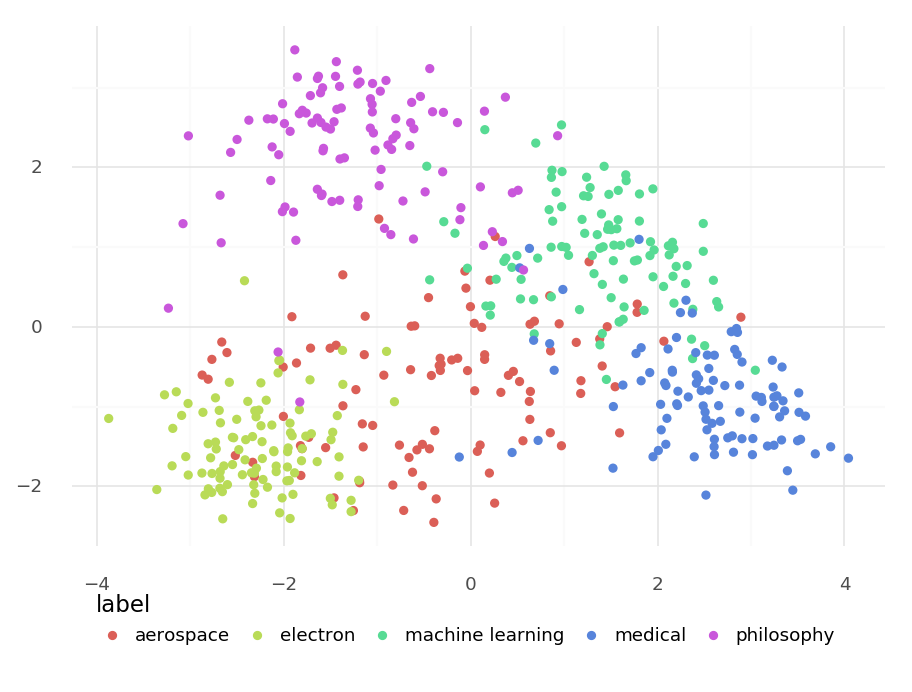

In [8]:
g=doc_embedder.scatter_plot(df.topic,method='PCA',
                            save_to='figures/universal_encoding_pca_plot.eps')

In [9]:
distance_matrix=similarity_matrix(docvecs[:20])

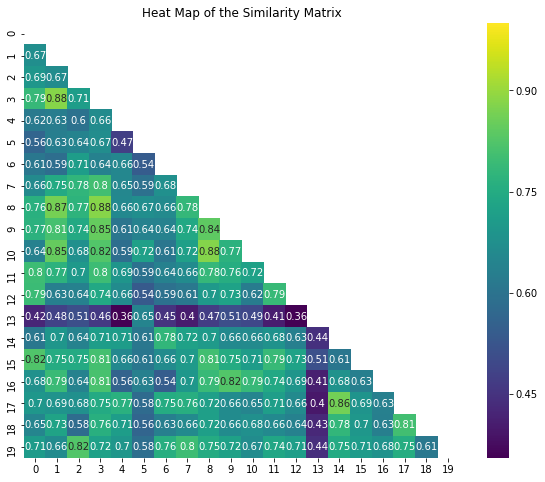

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
plot_matrix_heatmap(distance_matrix,ax=ax)
fig.savefig('figures/distance_matrix_heatmap.eps')

In [14]:
doc_embedder.report_topk_docs(document_topic=df.topic,
                              document_title=df.title,
                              k=3,
                              threshold=0.98)

Finding topic-similar articles by document semantic meanings
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Topic: philosophy
Title: The Interpretation of Wave Mechanics with the help of Waves with   Singular Regions

Most related articles:

Similairy score:99%
Topic: philosophy
Title: Elementary Considerations on the Interpretation of the Foundations of   Quantum Mechanics
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Topic: philosophy
Title: Elementary Considerations on the Interpretation of the Foundations of   Quantum Mechanics

Most related articles:

Similairy score:99%
Topic: philosophy
Title: The Interpretation of Wave Mechanics with the help of Waves with   Singular Regions
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

## Do Topic Modeling 


In [15]:
lda = LatentDirichletAllocation(n_components=5,learning_method='batch',n_jobs=-1,random_state=10)
X = lda.fit_transform(MinMaxScaler().fit_transform(docvecs))
label_pred = np.argmax(X,axis=-1)
label_true = LabelEncoder().fit_transform(df.topic)
nmi = normalized_mutual_info_score(label_true,
                                   label_pred)
print('NMI score:',nmi)
ari = adjusted_rand_score(label_true,label_pred)
print('ARI score:',ari)

NMI score: 0.6942994162067722
ARI score: 0.6132275519272278


/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/doc2vec_lda_tsne.eps
  warn('Filename: {}'.format(filename))


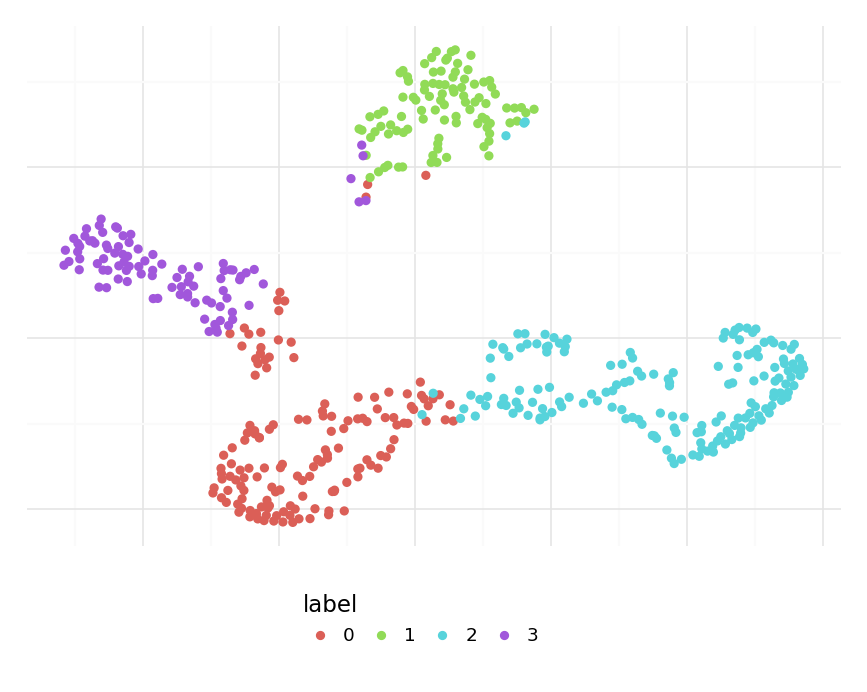

<ggplot: (8747358652122)>

In [16]:
g = plot_2d_projection(X,[str(i) for i in label_pred])
g.save('figures/doc2vec_lda_tsne.eps',dpi=300)
g

# Bag of Words

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words='english')
X_bow = vectorizer.fit_transform(df.subject)
print('documents shape:',X_bow.shape)
print('documents type:',type(X_bow))

documents shape: (500, 63295)
documents type: <class 'scipy.sparse.csr.csr_matrix'>


/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/Tfidf_encoding_TSNE.eps
  warn('Filename: {}'.format(filename))


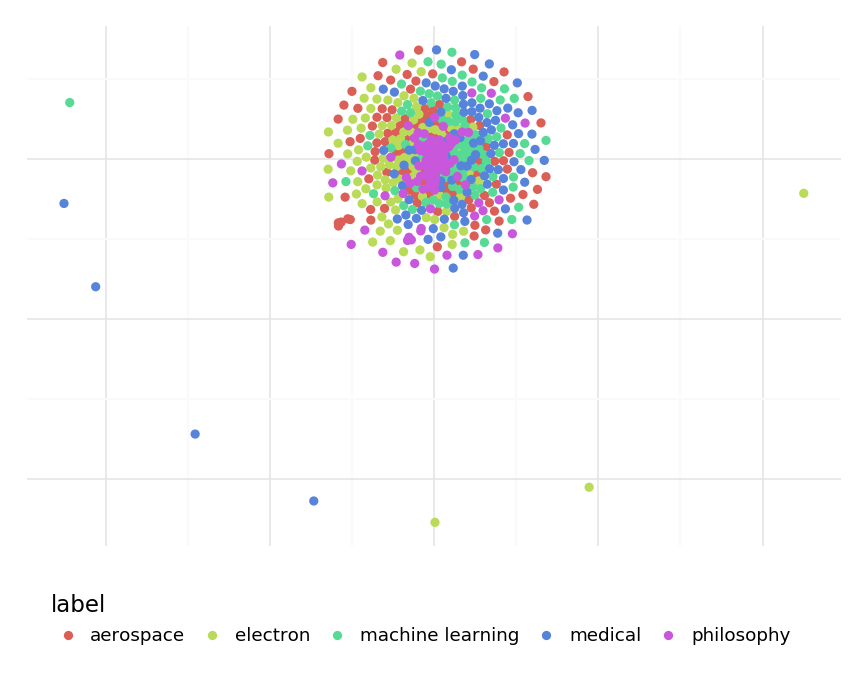

<ggplot: (-9223363289521258997)>

In [19]:
g=plot_2d_projection(X_bow.todense(),df.topic,method='TSNE')
g.save('figures/Tfidf_encoding_TSNE.eps',dpi=300)
g

/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/Tfidf_encoding_PCA.eps
  warn('Filename: {}'.format(filename))


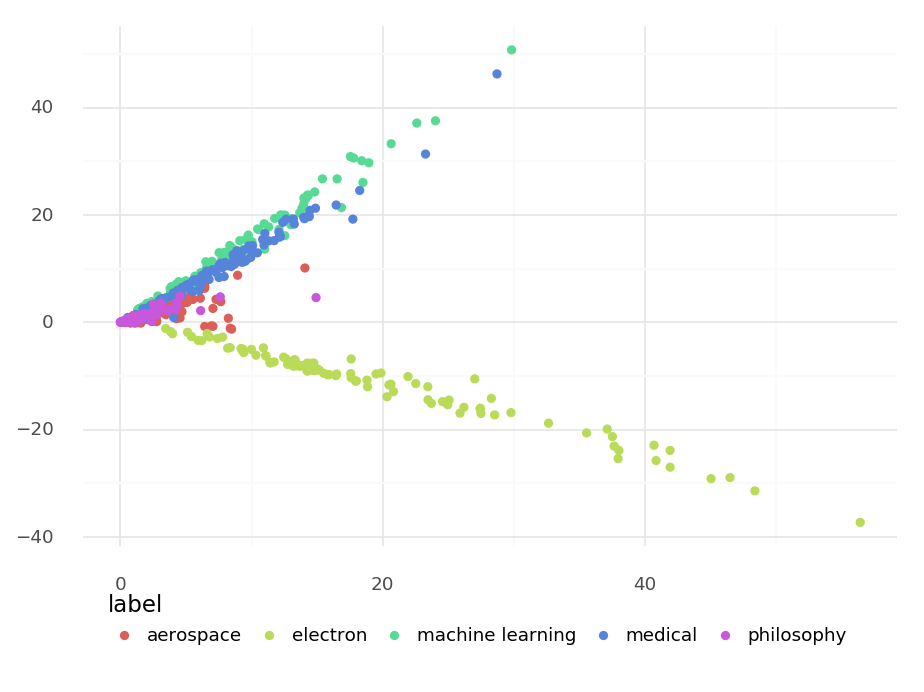

<ggplot: (8747334109609)>

In [20]:
g= plot_2d_projection(X_bow,df.topic)
g.save('figures/Tfidf_encoding_PCA.eps',dpi=300)
g

## Topic Modeling

In [22]:
lda = LatentDirichletAllocation(n_components=5,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=10)

In [23]:
X_topics = lda.fit_transform(X_bow)
label_pred = np.argmax(X_topics,axis=-1)
label_true = LabelEncoder().fit_transform(df.topic)
nmi = normalized_mutual_info_score(label_true,
                                   label_pred)
print('NMI score:',nmi)
ari = adjusted_rand_score(label_true,label_pred)
print('ARI score:',ari)

NMI score: 0.013991202320374162
ARI score: 0.004067696635245436


/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/Tfidf_LDA_TSNE.eps
  warn('Filename: {}'.format(filename))


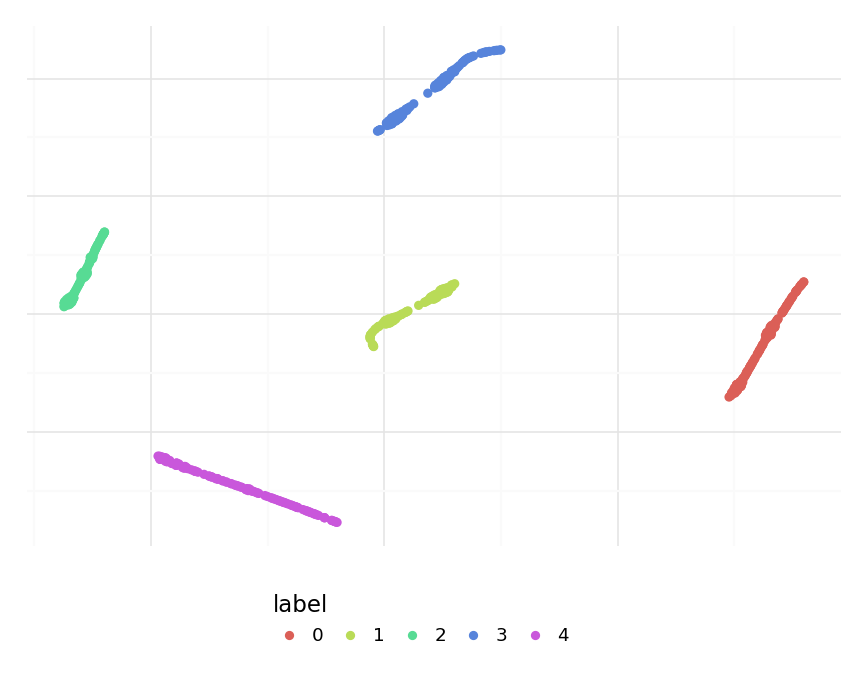

<ggplot: (-9223363289521652571)>

In [24]:
g= plot_2d_projection(X_topics,[str(i) for i in label_pred],method='TSNE')
g.save('figures/Tfidf_LDA_TSNE.eps',dpi=300)
g

# Word2Vec

In [25]:
from lexvec import LexVec

In [26]:
lexvec = LexVec(cache_path='data')

LexVec_weights.txt already exists in /home/augustinus/Desktop/CS_Project/CS4121_S2018_Project/data


In [27]:
# doc 2 vec using naive word2vec + averaging over words
X_lexvec = \
list(
map(lambda doc_str: np.mean(lexvec(
                                doc_str.lower().split()
                                ),
                            axis=0
                           ),
   df.subject.values
   )
)
X_lexvec=np.array(X_lexvec)
X_lexvec.shape

(500, 300)

/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/word2vec_with_avg_tSNE.eps
  warn('Filename: {}'.format(filename))


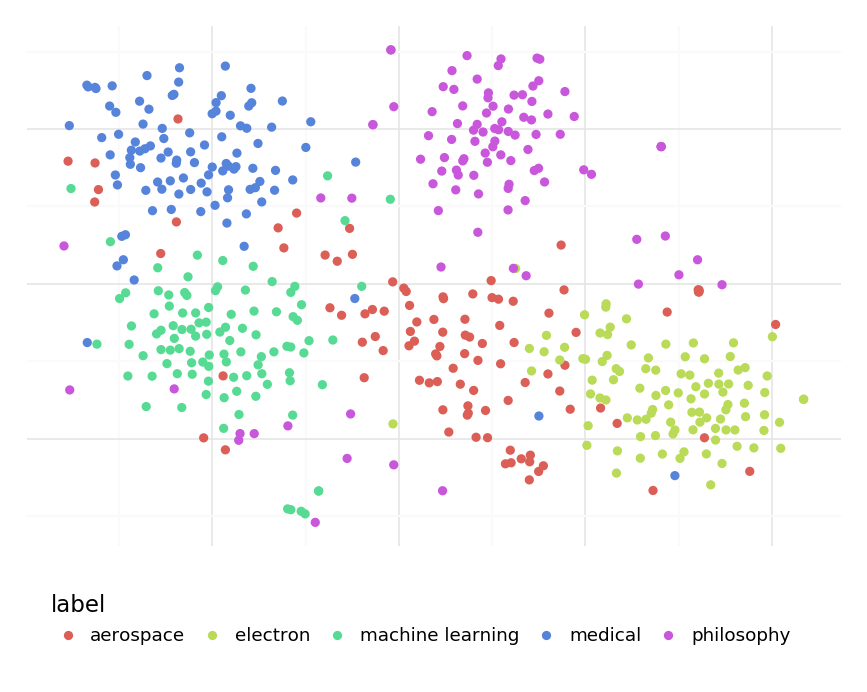

<ggplot: (8747289274446)>

In [28]:
g= plot_2d_projection(X_lexvec,df.topic,method='TSNE')
g.save('figures/word2vec_with_avg_tSNE.eps',dpi=300)
g

/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/word2vec_with_avg_PCA.eps
  warn('Filename: {}'.format(filename))


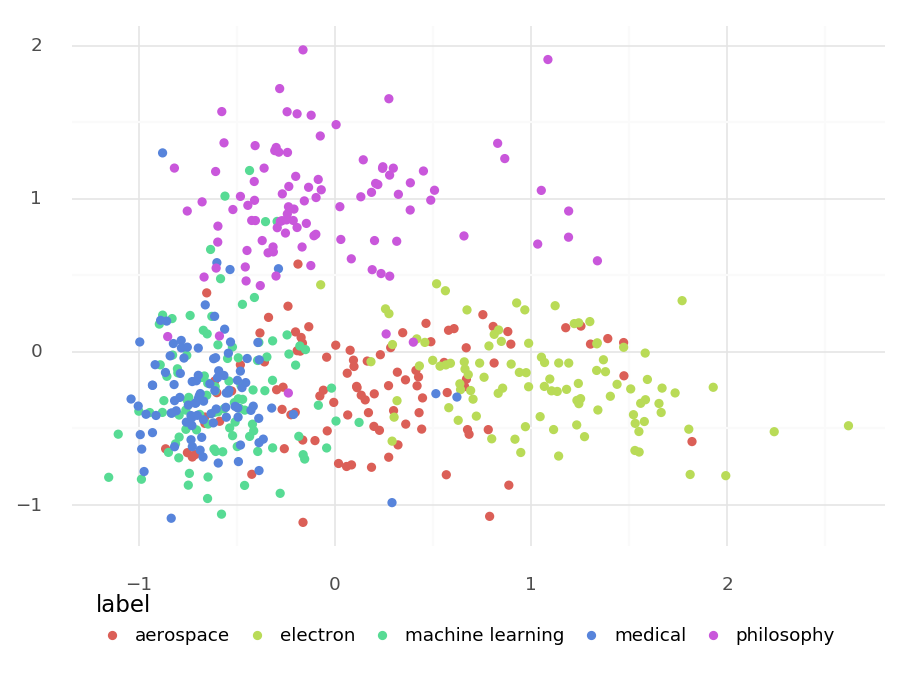

<ggplot: (8747289274295)>

In [29]:
g= plot_2d_projection(X_lexvec,df.topic,method='PCA')
g.save('figures/word2vec_with_avg_PCA.eps',dpi=300)
g

## Topic Modeling

In [30]:
X_topics = lda.fit_transform(MinMaxScaler().fit_transform(X_lexvec))
label_pred = np.argmax(X_topics,axis=-1)
label_true = LabelEncoder().fit_transform(df.topic)
nmi = normalized_mutual_info_score(label_true,
                                   label_pred)
print('NMI score:',nmi)
ari = adjusted_rand_score(label_true,label_pred)
print('ARI score:',ari)

NMI score: 0.2285151087570567
ARI score: 0.08685093188968902


/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 7 x 4.5 in image.
  from_inches(height, units), units))
/home/augustinus/.conda/envs/dp/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/word2vec_LDA_TSNE.eps
  warn('Filename: {}'.format(filename))


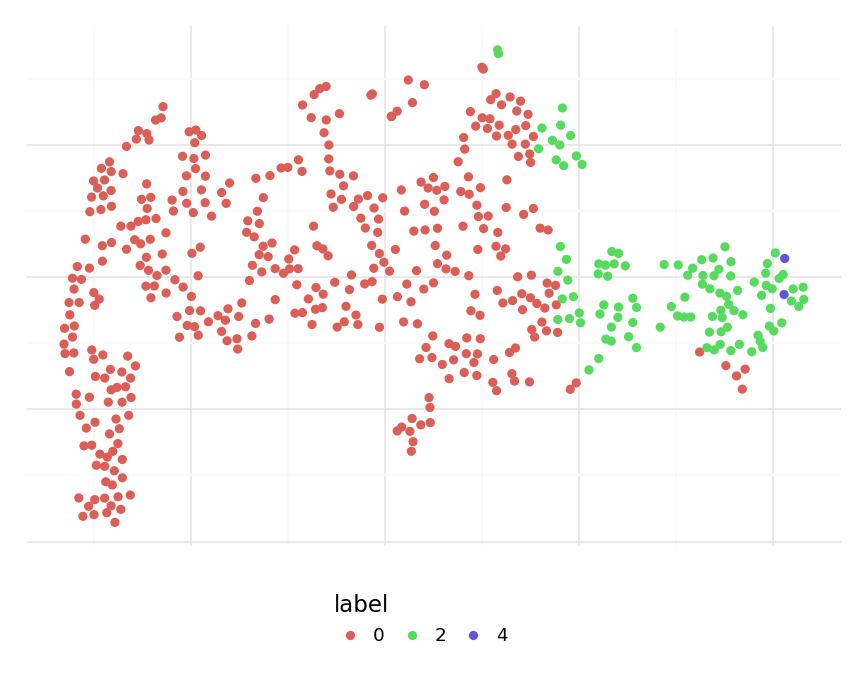

<ggplot: (-9223363289565500051)>

In [31]:
g= plot_2d_projection(X_topics,[str(i) for i in label_pred],method='TSNE')
g.save('figures/word2vec_LDA_TSNE.eps',dpi=300)
g